In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('data.txt', sep='\t')
df['room'] = df['building'] + ' ' + df['room'].astype(str)
df = df.drop(columns='building')
df

,room,width (in),length (in),height from floor (in),chair height (in)
0,recitation hall 101,18.500,11.1875,27.750,17.375
1,Smith Hall 209,12.500,11.5000,28.750,17.000
2,Purnell Hall 115,10.125,12.5000,23.500,16.000
3,Purnell Hall 227,16.500,11.5000,28.000,17.000
4,Ewing Hall 204,18.125,11.5000,27.000,17.250
5,Gore Hall 308,14.750,11.7500,29.500,18.250
6,Penny 209,26.750,23.5000,28.750,17.750
7,ISE 110,22.000,12.2500,28.250,18.000
8,Pearson 114,21.500,13.0000,29.000,19.500
9,Pearson 218,22.000,12.2500,28.250,18.000


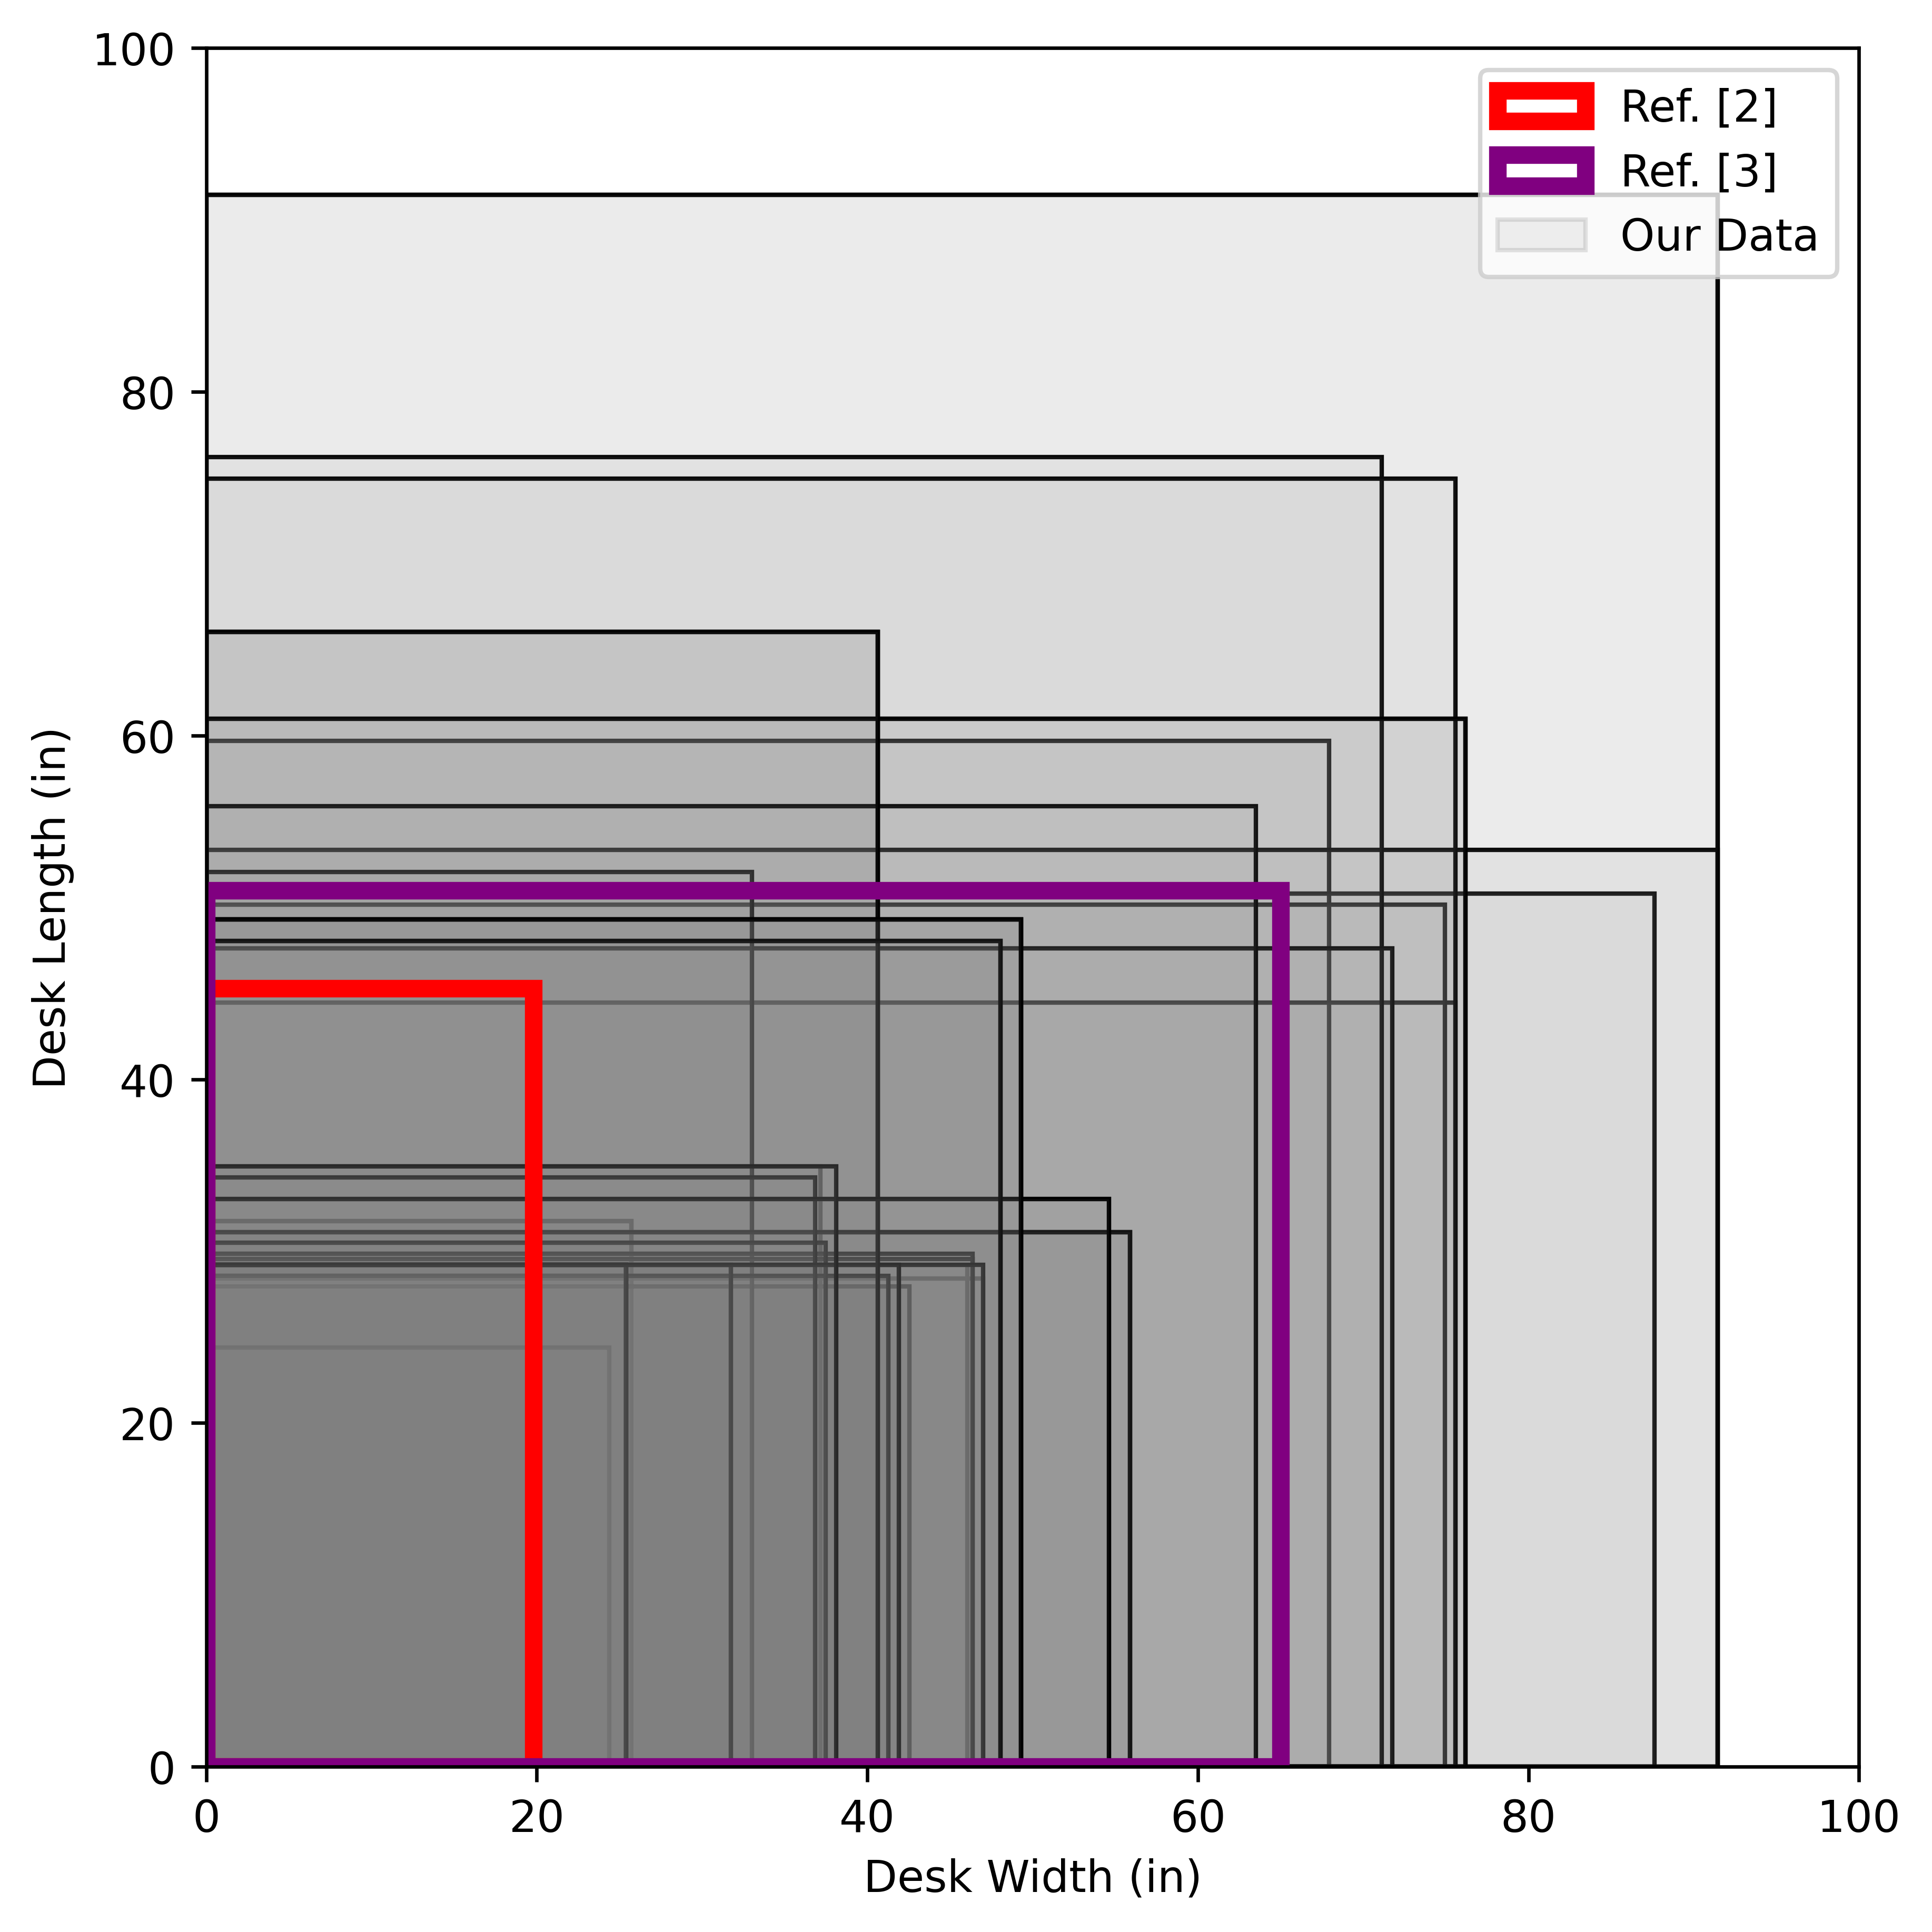

In [32]:
desk_width = np.array(df['width (in)']) * 2.54
desk_length = np.array(df['length (in)']) * 2.54


fig,ax = plt.subplots(dpi=600, figsize=(6,6), layout='constrained')
ax.set(xlabel='Desk Width (in)', ylabel='Desk Length (in)', xlim=(0, 100), ylim=(0,100))

color = np.array((151, 204, 231)) / 255

for w, l in zip(desk_width, desk_length):
    if w > 0 and l > 0:  
        rect = plt.Rectangle((0, 0), w, l, facecolor='none', edgecolor='black', label='_nolegend_')
        ax.add_patch(rect)
        rect = plt.Rectangle((0, 0), w, l, facecolor='grey', edgecolor='none', label='_nolegend_', alpha=0.08)
        ax.add_patch(rect)

literature_width = np.array([19.8, 65.0]) 
literature_length = np.array([45.3, 51.0]) 

for w, l, color in zip(literature_width, literature_length, ['red', 'purple']):
    if w > 0 and l > 0:  
        rect = plt.Rectangle((0, 0), w, l, facecolor='none', edgecolor=color, lw=4)
        ax.add_patch(rect)

rect = plt.Rectangle((0, 0), 0, 1, facecolor='grey', edgecolor='black',  alpha=0.1)
ax.add_patch(rect)

plt.legend(['Ref. [2]', 'Ref. [3]', 'Our Data'])
plt.savefig('rectangles.pdf')

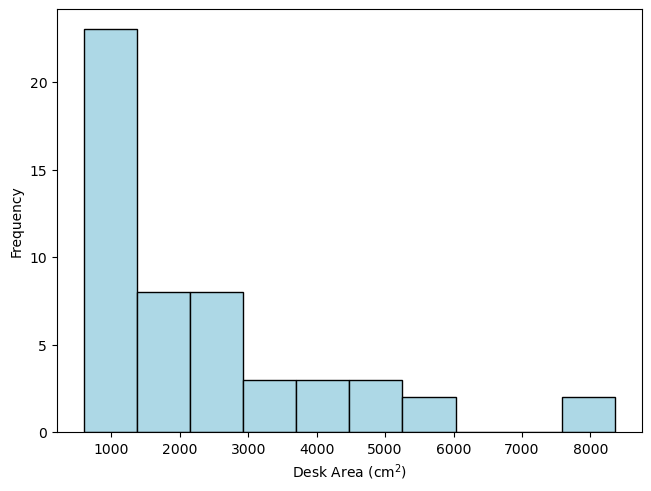

In [33]:
area = desk_width * desk_length 
fig,ax = plt.subplots(layout='constrained')
ax.hist(area, facecolor='lightblue', edgecolor='black')
ax.set(xlabel='Desk Area (cm$^2$)', ylabel='Frequency')
plt.savefig('hist.pdf')

In [34]:
styled_df = df.style.hide(axis='index')
styled_df.to_latex('table.tex')